##  Random forest Classifier 

- ${Random forest classifier}$ is the ${best model}$ for the classification, which is giving **highest accuracy score**
    - accuracy score = **0.9623** 
    - log loss = **0.36654**

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold

In [4]:
digit_df = pd.read_csv('full_mnist_digits.csv')

X = digit_df.drop('label',axis=1)

y = digit_df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=23, stratify=y)

###  Desiginig the model

In [29]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features': [3,4,5,6]}
# kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=23)
gcv_rf = GridSearchCV(rf, 
                      param_grid=params,
                      scoring='neg_log_loss',  
                      verbose=3)
gcv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................max_features=3;, score=-0.440 total time=   5.5s
[CV 2/5] END ...................max_features=3;, score=-0.432 total time=   5.4s
[CV 3/5] END ...................max_features=3;, score=-0.434 total time=   5.3s
[CV 4/5] END ...................max_features=3;, score=-0.431 total time=   5.4s
[CV 5/5] END ...................max_features=3;, score=-0.426 total time=   5.5s
[CV 1/5] END ...................max_features=4;, score=-0.420 total time=   6.2s
[CV 2/5] END ...................max_features=4;, score=-0.415 total time=   6.1s
[CV 3/5] END ...................max_features=4;, score=-0.423 total time=   6.1s
[CV 4/5] END ...................max_features=4;, score=-0.413 total time=   6.2s
[CV 5/5] END ...................max_features=4;, score=-0.410 total time=   6.3s
[CV 1/5] END ...................max_features=5;, score=-0.403 total time=   6.6s
[CV 2/5] END ...................max_features=5;, 

GridSearchCV(estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_features': [3, 4, 5, 6]}, scoring='neg_log_loss',
             verbose=3)

In [30]:
y_pred = gcv_rf.predict(X_test)

###  Accuracy score for the random forest classifier

In [31]:
y_pred_proba = gcv_rf.predict_proba(X_test)

In [32]:
loss = log_loss(y_test,y_pred_proba)
loss

0.3665487793028597

In [33]:
score  = accuracy_score(y_test,y_pred)
score

0.9623888888888888

###  Classification report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1777
           1       0.98      0.99      0.98      2023
           2       0.95      0.96      0.96      1787
           3       0.95      0.94      0.94      1839
           4       0.96      0.96      0.96      1753
           5       0.96      0.95      0.96      1626
           6       0.97      0.98      0.97      1775
           7       0.97      0.96      0.97      1880
           8       0.95      0.94      0.95      1755
           9       0.95      0.94      0.94      1785

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



###  Confusion matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1752    0    5    1    0    2   10    0    6    1]
 [   0 1994   12    2    4    0    2    5    2    2]
 [  10    4 1720   10    9    1    5    8   19    1]
 [   2    2   30 1728    2   18    4   16   25   12]
 [   3    2    5    0 1690    0   10    3    5   35]
 [   7    1    2   28    3 1548   20    1    9    7]
 [  10    3    1    0    4   16 1738    0    3    0]
 [   3   12   19    2    7    0    0 1814    2   21]
 [   4   10    9   27    9   16    6    2 1654   18]
 [   7    2    6   23   28    4    0   16   14 1685]]


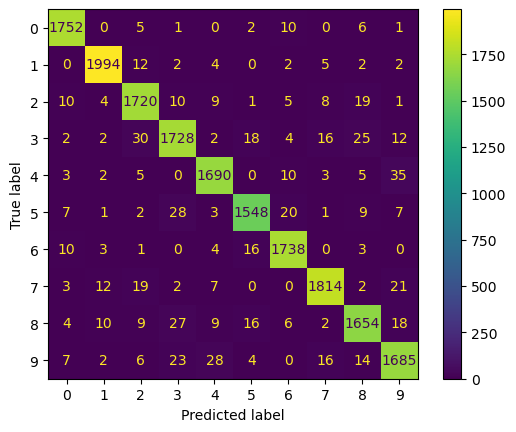

In [36]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()